In [46]:
# global definitions

import glob

import math

from csv import reader

import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_network_dir = 'data/twitter_networks/'

x_image_filename = 'data/x_img.jpg'

In [31]:
# identify all test network files

test_networks = glob.glob(test_network_dir + "test*")
print(test_networks)

['data/twitter_networks/test_bipirtite_graph_no_header_multiplicity.py', 'data/twitter_networks/test_bipirtite_graph_no_header_wrong.csv', 'data/twitter_networks/test_directed_incomplete_graph_header.csv', 'data/twitter_networks/test_bipirtite_graph_header_wrong.csv', 'data/twitter_networks/test_bipirtite_graph_header.csv', 'data/twitter_networks/test_bipirtite_graph_no_header.csv', 'data/twitter_networks/test_directed_complete_graph_header.csv', 'data/twitter_networks/test_bipirtite_graph_header_multiplicity.csv']


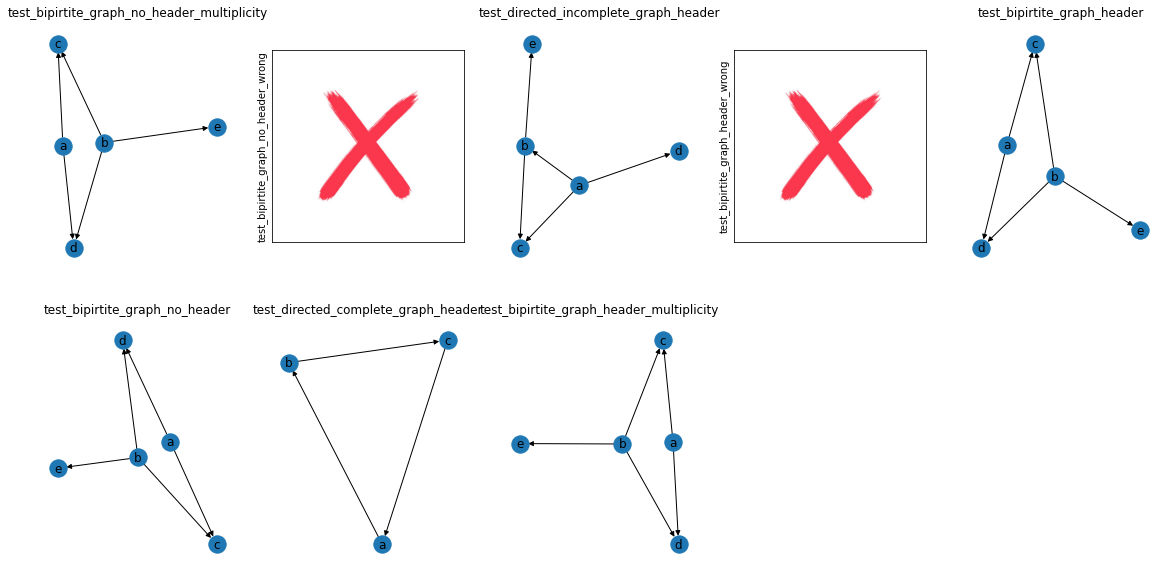

In [56]:
cols = 5 # images per row
rows = int(math.ceil(len(test_networks) / cols))

x_img = mpimg.imread(x_image_filename)

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 10))
ax = axes.flatten()

for i in range(rows):
    for j in range(cols):
        axes[i, j].set_xticks([]), axes[i, j].set_yticks([]) #, axes[i, j].axis('off')

i = 0
j = 0
n_i = 0
for n in test_networks:
    # read file and create graph
    G = nx.DiGraph()
    
    with open(n, 'r') as fn:
        csv_reader = reader(fn)
        first_line = True
        source_column_index = None
        target_column_index = None
        for row in csv_reader:
            if len(row) < 2:
                G = None
                break
                
            if first_line:
                if 'source' in row:
                    source_column_index = row.index('source')
                    if 'target' in row:
                        target_column_index = row.index('target')
                    else:
                        G = None
                        break
                else:
                    source_column_index = 0
                    target_column_index = 1
                    
                    G.add_edge(row[source_column_index], row[target_column_index])
            else:
                G.add_edge(row[source_column_index], row[target_column_index])
    
    network_name = n[n.rindex('/') + 1:n.index('.')]
    axes[i, j].set_ylabel(network_name)
    if G is not None:
        axes[i, j].set_title(network_name)
        nx.draw(G, pos=None, ax = ax[n_i], with_labels = True)
    else:
        axes[i, j].imshow(x_img)
       
    n_i = n_i + 1
    j = j + 1
    if j >= cols:
        j = 0
        i = i + 1
        
while i < rows:
    while j < cols:
        axes[i, j].axis('off')
        j = j +1
    j = 0
    i = i + 1